# Experiment : Network growth

## Run the samples

In [1]:
# Script for generate  experiments
# Imports
from clases.red_rddas_model import RedRddasModel
import ray
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ray Configurations
ray.init(num_cpus=12, log_to_driver=False)

# Experiment for RDD variation
n_experiments = 10
l_experiments = []
for cont_experiment in range(1,n_experiments+1):
    print("============================")
    print("Experiment:", cont_experiment)
    print("============================")

    # Variable Parameters
    n_rddas_min = 3
    n_rddas_max = 10

    # Fixed Parameters
    n_of_variables_rdda = 5
    n_of_signals_rdda = 2
    n_exit_variables = 2
    n_clauses_function = 2
    type_network = "ALEATORY"
    # this name has to be unique
    unique_path = "21_01_2022"

    # List of Result for the Experiments
    l_res_experiment = []

    v_n_network = 1
    for n_of_rdds in range(n_rddas_min, n_rddas_max + 1):
        print("Number of Network:", v_n_network)
        print("-------------------------------")

        path = "files/" + unique_path + "_" + str(n_of_rdds) + "_" + str(n_of_variables_rdda) + "_" + str(n_of_signals_rdda) \
               + "_" + str(n_exit_variables) + "_" + str(n_clauses_function)

        # generate the RDDAs of the Network of RDDAs
        print("generating the Network of RDDAs ...")
        oRedRddasModel = RedRddasModel(n_of_rdds, n_of_variables_rdda, n_of_signals_rdda, n_exit_variables,
                                       n_clauses_function)

        # Generate the RDDs
        print("generating the rdds ...")
        oRedRddasModel.generate_rddas(type_network=type_network)

        # # Save the Network of RDDAs in a Pickle file
        # RedRddasModel.save_file_pickle(oRedRddasModel, path)
        # path += ".pickle"
        #
        # print("=======================================================")
        # print("The Network of RDDAs is saved in: ", path)

        # Show the Network of RDDAs
        # oRedRddasModel.show()

        # Calculate the Attractors by RDDA and by Signal
        v_begin_0 = time.time()
        result = RedRddasModel.find_attractors_rddas_ray.remote(oRedRddasModel)
        oRedRddasModel = ray.get(result)
        v_end_0 = time.time()
        v_time_0 = v_end_0 - v_begin_0

        # Calculate the Attractors by RDDA and by Signal
        v_begin_1 = time.time()
        result = RedRddasModel.calculation_compatible_pairs.remote(oRedRddasModel)
        oRedRddasModel = ray.get(result)
        v_end_1 = time.time()
        v_time_1 = v_end_1 - v_begin_1

        # # Calculate the Attractors by RDDA and by Signal with iterative Method
        # v_begin_1 = time.time()
        # # result = RedRddasModel.assembly_attractor_fields_iterative.remote(oRedRddasModel)
        # # oRedRddasModel = ray.get(result)
        # v_end_1 = time.time()
        # v_time_1 = v_end_1 - v_begin_1

        # Calculate the Attractors by RDDA and by Signal with optimized Method
        v_begin_2 = time.time()
        result = RedRddasModel.assembly_attractor_fields_optimized.remote(oRedRddasModel)
        oRedRddasModel = ray.get(result)
        v_end_2 = time.time()
        v_time_2 = v_end_2 - v_begin_2

        # Save the results for the experiment , numeric and time indicators
        res_dict = {
                    "n_network": v_n_network,
                    "n_rdds": n_of_rdds,
                    "n_rdda_attractors": len(oRedRddasModel.d_global_rdda_attractor.items()),
                    "t_find_attractors_method": v_time_0,
                    "n_pair_attractors": len(oRedRddasModel.list_attractors_pairs),
                    "t_comp_paris_method": v_time_1,
                    "n_attractor_fields": len(oRedRddasModel.attractor_fields),
                    "t_optimized_method": v_time_2
                    }
        l_res_experiment.append(res_dict)
        v_n_network = v_n_network + 1

    # Add the sample data to pandas dataframe
    df = pd.DataFrame.from_dict(l_res_experiment)
    l_experiments.append(df)
print("END EXPERIMENT")

Experiment: 1
Number of Network: 1
-------------------------------
generating the Network of RDDAs ...
generating the rdds ...
Generating the True Table
A ∨ B
{'6': 'A', '9': 'B'}
{'A': True, 'B': True}
A ∨ B
{'6': 'A', '9': 'B'}
{'A': True, 'B': False}
A ∨ B
{'6': 'A', '9': 'B'}
{'A': False, 'B': True}
A ∨ B
{'6': 'A', '9': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'2': 'A', '1': 'B'}
{'A': True, 'B': True}
A ∨ B
{'2': 'A', '1': 'B'}
{'A': True, 'B': False}
A ∨ B
{'2': 'A', '1': 'B'}
{'A': False, 'B': True}
A ∨ B
{'2': 'A', '1': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'12': 'A', '11': 'B'}
{'A': True, 'B': True}
A ∨ B
{'12': 'A', '11': 'B'}
{'A': True, 'B': False}
A ∨ B
{'12': 'A', '11': 'B'}
{'A': False, 'B': True}
A ∨ B
{'12': 'A', '11': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'6': 'A', '8': 'B'}
{'A': True, 'B': True}
A ∨ B
{'6': 'A', '8': 'B'}
{'A': True, 'B': False}
A ∨ B
{'6': 'A', '8': 'B'}
{'A': False, 'B': Tru

## Analysing the results

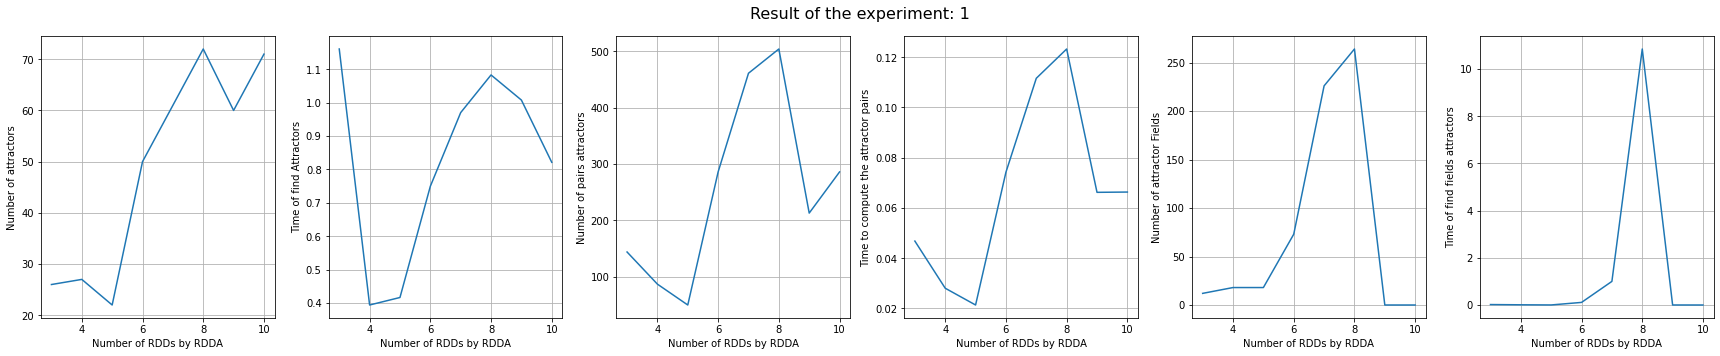

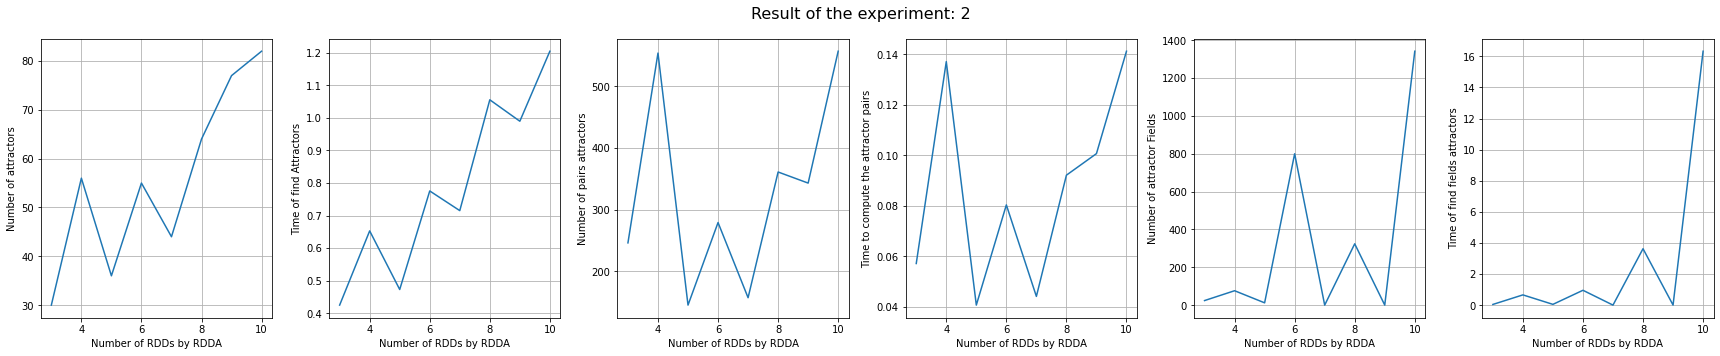

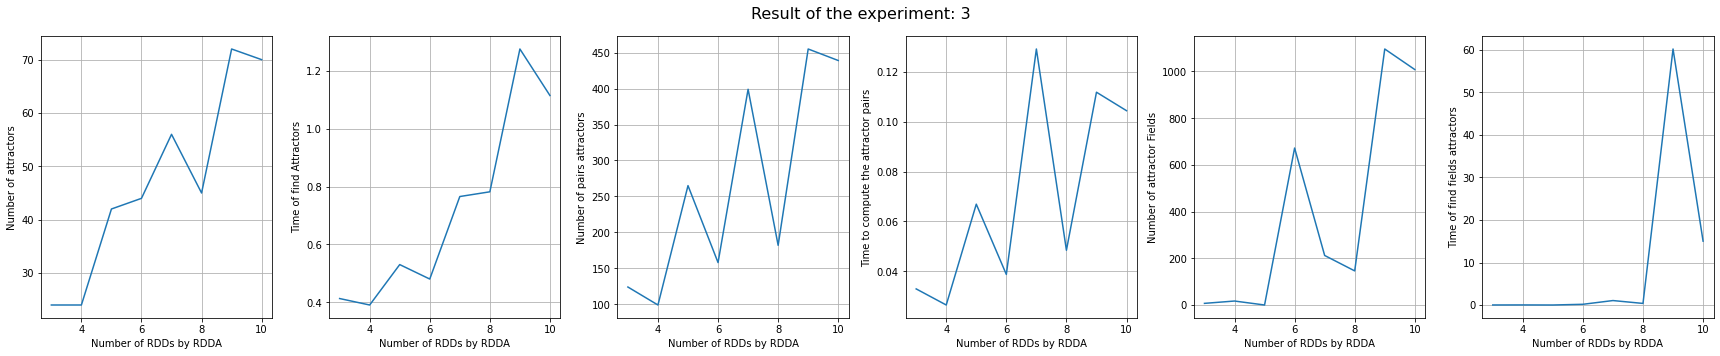

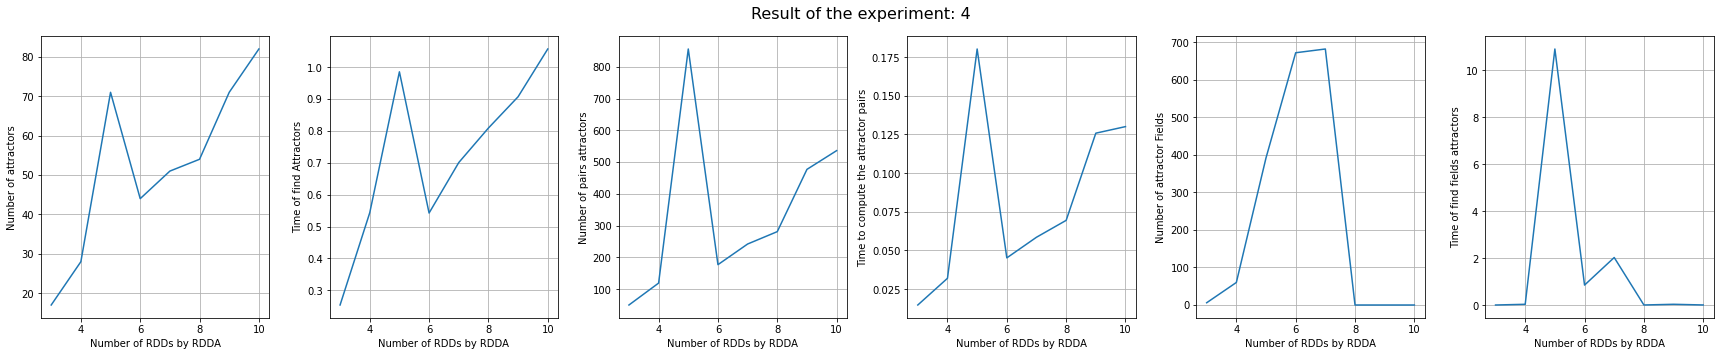

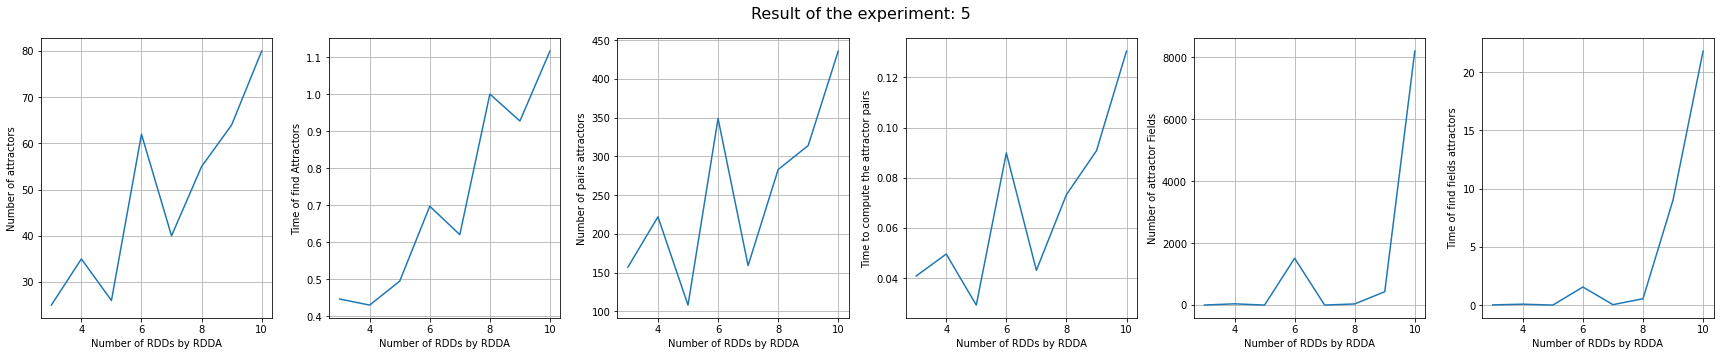

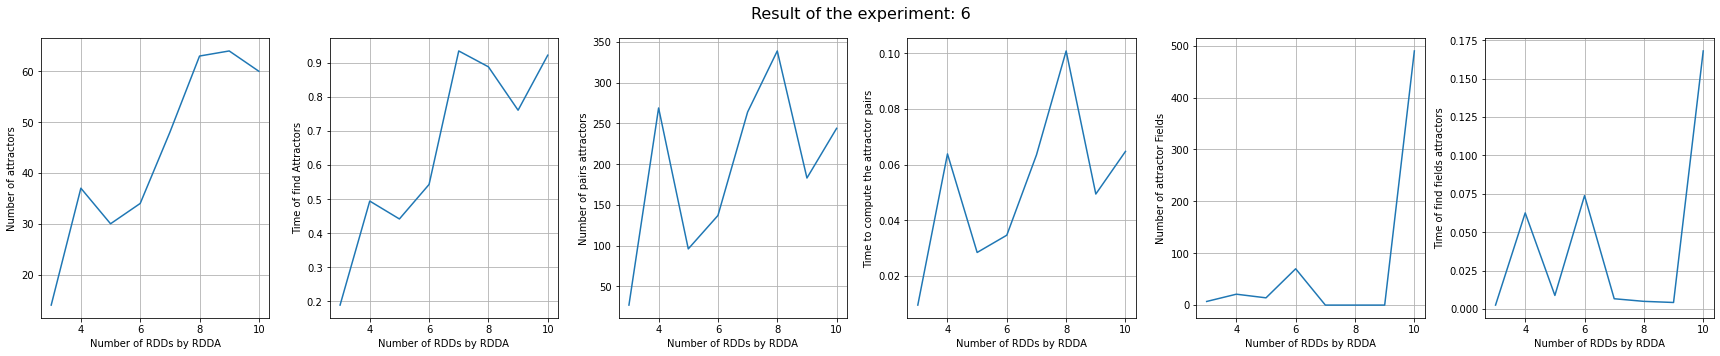

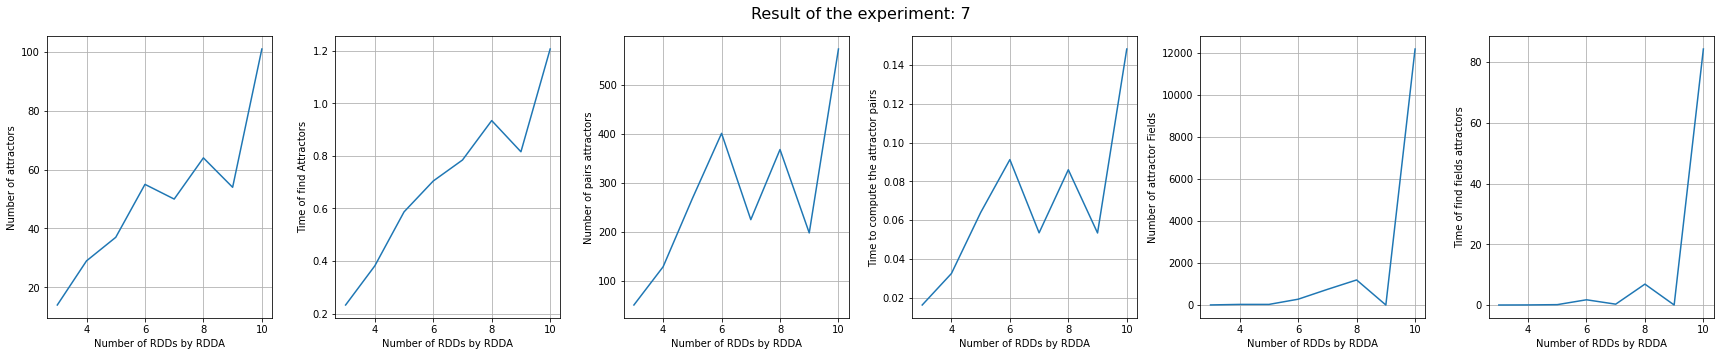

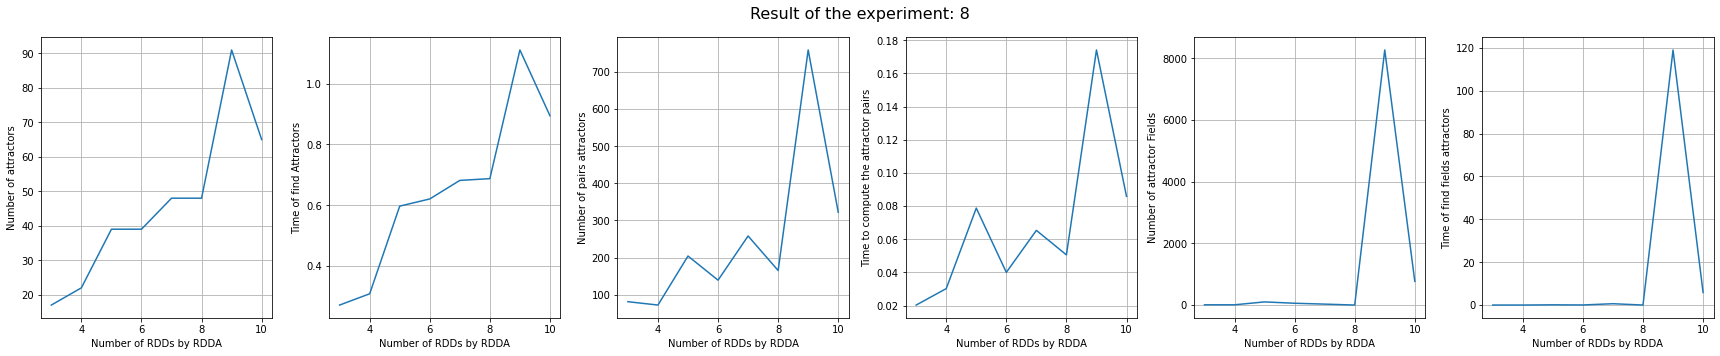

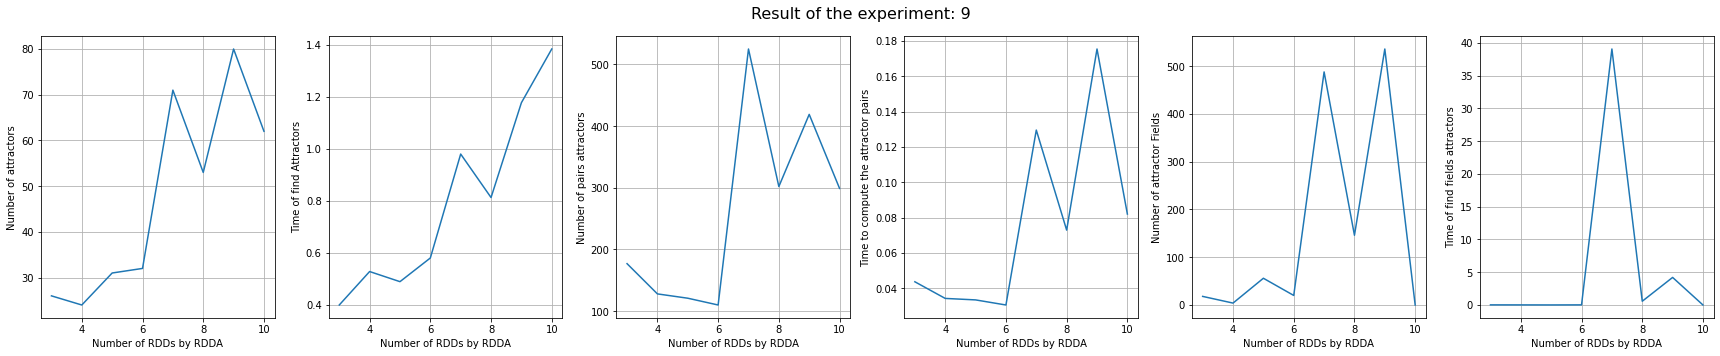

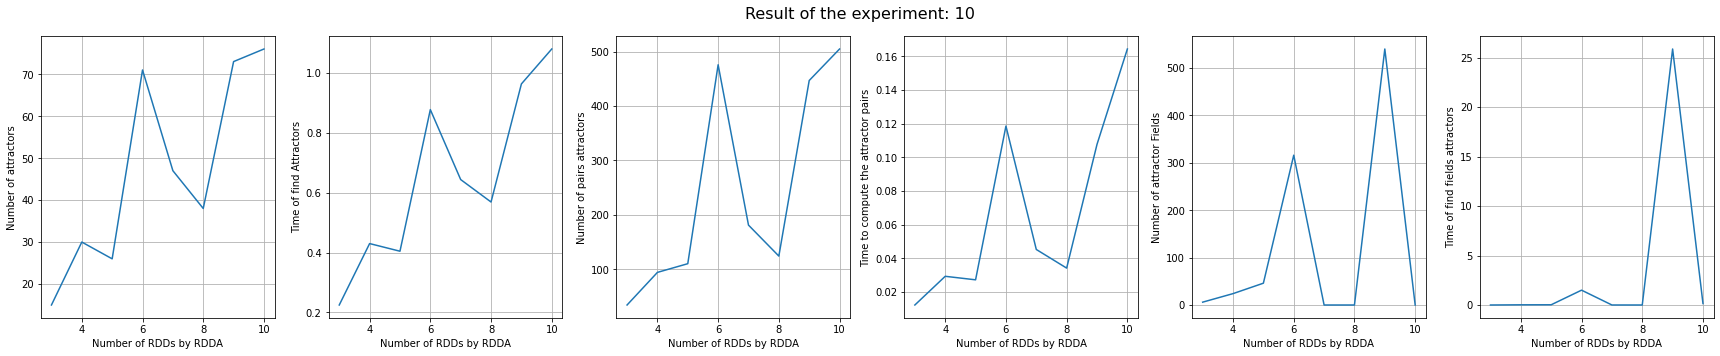

In [2]:
# Show the graphs for every experiment
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]
n_experiment = 1
for df in l_experiments:
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    cont_label = 0
    for (ax, y) in zip(axs, np.asarray(df.keys())[2:]):
        ax.plot(df['n_rdds'], df[y])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(l_labels_y[cont_label])
        ax.grid(True)
        cont_label += 1
    fig_.suptitle('Result of the experiment: ' + str(n_experiment), fontsize=16)
    fig_.tight_layout()
    n_experiment +=1

### Show the Metrics

In [29]:
pd_res = pd.concat(l_experiments, keys=range(1,11))
pd_res.keys()
pd_res

n_network  n_rdds  n_rdda_attractors  t_find_attractors_method  \
1  0          1       3                 26                  1.160524   
   1          2       4                 27                  0.394212   
   2          3       5                 22                  0.416693   
   3          4       6                 50                  0.749587   
   4          5       7                 61                  0.970111   
...         ...     ...                ...                       ...   
10 3          4       6                 71                  0.876868   
   4          5       7                 47                  0.643420   
   5          6       8                 38                  0.568513   
   6          7       9                 73                  0.962597   
   7          8      10                 76                  1.079158   

      n_pair_attractors  t_comp_paris_method  n_attractor_fields  \
1  0                144             0.046819                  12   
   1                 87             0.028054                  18   
   2                 50             0.021377                  18   
   3                286             0.074228                  73   
   4                461             0.111596                 226   
...                 ...                  ...                 ...   
10 3                476             0.118502                 316   
   4                181             0.045271                   0   
   5                124             0.034218                   0   
   6                447             0.107638                 540   
   7                505             0.164226                   0   

      t_optimized_method  
1  0            0.022914  
   1            0.012789  
   2            0.006417  
   3            0.113877  
   4            1.004000  
...                  ...  
10 3            1.501267  
   4            0.004424  
   5            0.003878  
   6           25.860715  
   7            0.151028  

[80 rows x 8 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f745a911f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f745a4e7ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f745a911700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f745a4e7490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f745a4e7130>],
 'means': []}

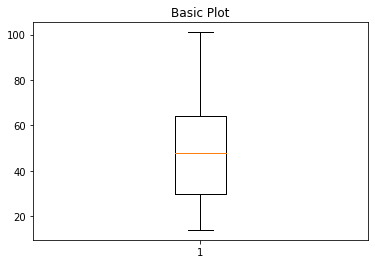

In [32]:
# Analysing the number of attractors
data = pd_res['n_rdda_attractors']
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)